## Problem/Description
The study aims to analyze Airbnb listing data to gain insights into pricing dynamics, user ratings, and review patterns across different neighborhoods. The data contains various features that could influence both the price of a listing and the feedback it receives from guests. This will enhance the understanding of the Airbnb market dynamics as well as provide helfpul insights for hosts and platform developers to improve their offerings and strategies.

## Research Questions
1. Can we predict the price of a listing based on its features (e.g., location, room type, amenities, etc)?
2. Can we predict the likelihood of a listing receiving a high overall review score based on its features?

## Data

### Variables
- id: Unique identifier for each listing
- listing_url: URL of the listing on Airbnb
- scrape_id: Identifier for the data scraping operation
- last_scraped: Date when the data was last scraped
- source: Source of the listing data
- name: Name or title of the listing
- description: Detailed description of the listing provided by the host
- neighborhood_overview: Host's description of the surrounding neighborhood
- picture_url: URL of the main picture for the listing
- host_id: Unique identifier for the host
- host_name: Name of the host
- host_since: Date when the host started hosting on Airbnb
- host_location: Location of the host
- host_response_time: Time it takes for the host to respond to inquiries
- host_response_rate: Percentage of inquiries the host responds to
- host_is_superhost: Whether the host is classified as a superhost
- host_verifications: Types of verifications the host has completed
- host_has_profile_pic: Whether the host has a profile picture
- host_identity_verified: Whether the hostâ€™s identity has been verified
- neighbourhood_cleansed: Name of the neighborhood where the listing is located
- latitude: Latitude coordinates of the listing
- longitude: Longitude coordinates of the listing
- property_type: Type of property being listed (e.g., house, apartment)
- room_type: Type of room available (e.g., entire home, private room)
- accommodates: Number of guests the listing can accommodate
- bathrooms_text: Number and type of bathrooms
- bedrooms: Number of bedrooms in the listing
- beds: Number of beds available in the listing
- amenities: List of amenities available in the listing
- price: Price per night in USD
- minimum_nights: Minimum number of nights required for booking
- maximum_nights: Maximum number of nights allowed for booking
- number_of_reviews: Total number of reviews received by the listing
- review_scores_rating: Overall rating score for the listing based on user reviews
- review_scores_accuracy: Rating score for the accuracy of the listing description
- review_scores_cleanliness: Rating score for cleanliness of the listing
- review_scores_checkin: Rating score for the ease of check-in
- review_scores_communication: Rating score for host communication
- review_scores_location: Rating score for the location of the listing
- review_scores_value: Rating score for the value of the listing
- instant_bookable: Whether the listing is available for instant booking
- reviews_per_month: Average number of reviews the listing receives per month

### Loading and Cleansing Data

In [ ]:
import numpy as np # type: ignore # For matrix and numerical calculations; foundation of pandas
import pandas as pd # type: ignore # For dataframe manipulation
import seaborn as sns # type: ignore # For visualizations and plotting
import matplotlib.pyplot as plt # For visualizations and plotting
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
listings_df = pd.read_csv('listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20240630022847,2024-06-30,city scrape,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,...,5.00,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,2.53
1,364,https://www.airbnb.com/rooms/364,20240630022847,2024-06-30,city scrape,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,...,4.96,4.65,4.71,NaN,f,1,1,0,0,0.47
2,590,https://www.airbnb.com/rooms/590,20240630022847,2024-06-30,city scrape,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/d84d5bc6-f7cb...,933,...,4.95,4.76,4.85,2021-BFN-0000578,f,2,0,2,0,3.91
3,592,https://www.airbnb.com/rooms/592,20240630022847,2024-06-30,city scrape,private,This room is in the basement. It does not hav...,NaN,https://a0.muscache.com/pictures/ba522ff9-84c9...,933,...,4.95,4.82,4.86,2021-BFN-0000578,f,2,0,2,0,0.94
4,1940,https://www.airbnb.com/rooms/1940,20240630022847,2024-06-30,city scrape,Baker Studio: Private-full kitchen-W/D-walkable,Private studio with separate entrance in histo...,Walking through the Baker historical neighborh...,https://a0.muscache.com/pictures/miso/Hosting-...,2150,...,4.98,4.89,4.86,2018-BFN-0002596,f,1,1,0,0,2.02


#### Data Cleaning
- We picked columns to keep that are helpfulf for our analysis. There were many columns that were unhelpful or duplicates.
- We removed the missing data from these columns, because it would skew our data results for analysis, and we still have 3,712 rows of data to do our analysis.
- We removed outliers as this can also skew our data.

##### **Columns to Keep**

In [ ]:
# Specify the columns to keep
columns_to_keep = [
    "id", "host_response_time", "host_response_rate", "host_is_superhost", 
    "neighbourhood_cleansed", "property_type", "room_type", "accommodates", 
    "bathrooms", "bedrooms", "beds", "amenities", "price", 
    "number_of_reviews", "review_scores_rating", "review_scores_value"
]

# Keep only the specified columns
listings_df = listings_df.loc[:, columns_to_keep]

In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5016 non-null   int64  
 1   host_response_time      4623 non-null   object 
 2   host_response_rate      4623 non-null   object 
 3   host_is_superhost       4868 non-null   object 
 4   neighbourhood_cleansed  5016 non-null   object 
 5   property_type           5016 non-null   object 
 6   room_type               5016 non-null   object 
 7   accommodates            5016 non-null   int64  
 8   bathrooms               4677 non-null   float64
 9   bedrooms                4972 non-null   float64
 10  beds                    4671 non-null   float64
 11  amenities               5016 non-null   object 
 12  price                   4638 non-null   object 
 13  number_of_reviews       5016 non-null   int64  
 14  review_scores_rating    4393 non-null   

In [ ]:
# Converting 'host_response_rate' to a numerical type
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.rstrip('%').astype(float) / 100
# Remove the $ sign and convert to numeric (float)
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
listings_df.head()

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_value
0,360,within an hour,1.0,t,Highland,Entire guesthouse,Entire home/apt,2,1.0,2.0,2.0,"[""Hangers"", ""Essentials"", ""Dedicated workspace...",161.0,181,4.99,4.91
1,364,NaN,NaN,f,Five Points,Entire loft,Entire home/apt,3,1.5,1.0,1.0,"[""Hangers"", ""Essentials"", ""Dedicated workspace...",179.0,87,4.85,4.71
2,590,within an hour,1.0,t,North Park Hill,Private room in home,Private room,3,1.0,1.0,1.0,"[""Hangers"", ""Essentials"", ""Dishwasher"", ""Dedic...",70.0,726,4.85,4.85
3,592,within an hour,1.0,t,North Park Hill,Private room in home,Private room,2,1.0,1.0,1.0,"[""Hangers"", ""Essentials"", ""Dishwasher"", ""Dedic...",64.0,175,4.87,4.86
4,1940,within an hour,1.0,t,Baker,Entire guesthouse,Entire home/apt,2,1.0,0.0,1.0,"[""Hangers"", ""Essentials"", ""Clothing storage: w...",88.0,183,4.96,4.86


In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5016 non-null   int64  
 1   host_response_time      4623 non-null   object 
 2   host_response_rate      4623 non-null   float64
 3   host_is_superhost       4868 non-null   object 
 4   neighbourhood_cleansed  5016 non-null   object 
 5   property_type           5016 non-null   object 
 6   room_type               5016 non-null   object 
 7   accommodates            5016 non-null   int64  
 8   bathrooms               4677 non-null   float64
 9   bedrooms                4972 non-null   float64
 10  beds                    4671 non-null   float64
 11  amenities               5016 non-null   object 
 12  price                   4638 non-null   float64
 13  number_of_reviews       5016 non-null   int64  
 14  review_scores_rating    4393 non-null   

##### **Removing Missing Data**

In [ ]:
# Display columns with missing data and the count of missing values in each
missing_data = listings_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

host_response_time      393
host_response_rate      393
host_is_superhost       148
bathrooms               339
bedrooms                 44
beds                    345
price                   378
review_scores_rating    623
review_scores_value     629
dtype: int64


In [ ]:
# List of columns to check for missing values
columns_to_check = [
    "host_response_time", "host_response_rate", "host_is_superhost", 
    "bathrooms", "bedrooms", "beds", "price", 
    "review_scores_rating", "review_scores_value"
]

# Drop rows with missing data in the specified columns
listings_df = listings_df.dropna(subset=columns_to_check)

In [ ]:
listings_df.head()

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_value
0,360,within an hour,1.0,t,Highland,Entire guesthouse,Entire home/apt,2,1.0,2.0,2.0,"[""Hangers"", ""Essentials"", ""Dedicated workspace...",161.0,181,4.99,4.91
2,590,within an hour,1.0,t,North Park Hill,Private room in home,Private room,3,1.0,1.0,1.0,"[""Hangers"", ""Essentials"", ""Dishwasher"", ""Dedic...",70.0,726,4.85,4.85
3,592,within an hour,1.0,t,North Park Hill,Private room in home,Private room,2,1.0,1.0,1.0,"[""Hangers"", ""Essentials"", ""Dishwasher"", ""Dedic...",64.0,175,4.87,4.86
4,1940,within an hour,1.0,t,Baker,Entire guesthouse,Entire home/apt,2,1.0,0.0,1.0,"[""Hangers"", ""Essentials"", ""Clothing storage: w...",88.0,183,4.96,4.86
5,21745,within a few hours,1.0,t,North Capitol Hill,Private room in home,Private room,2,2.0,1.0,1.0,"[""Hangers"", ""Essentials"", ""Dishwasher"", ""Books...",43.0,236,4.72,4.73


##### **Reviewing Outliers**

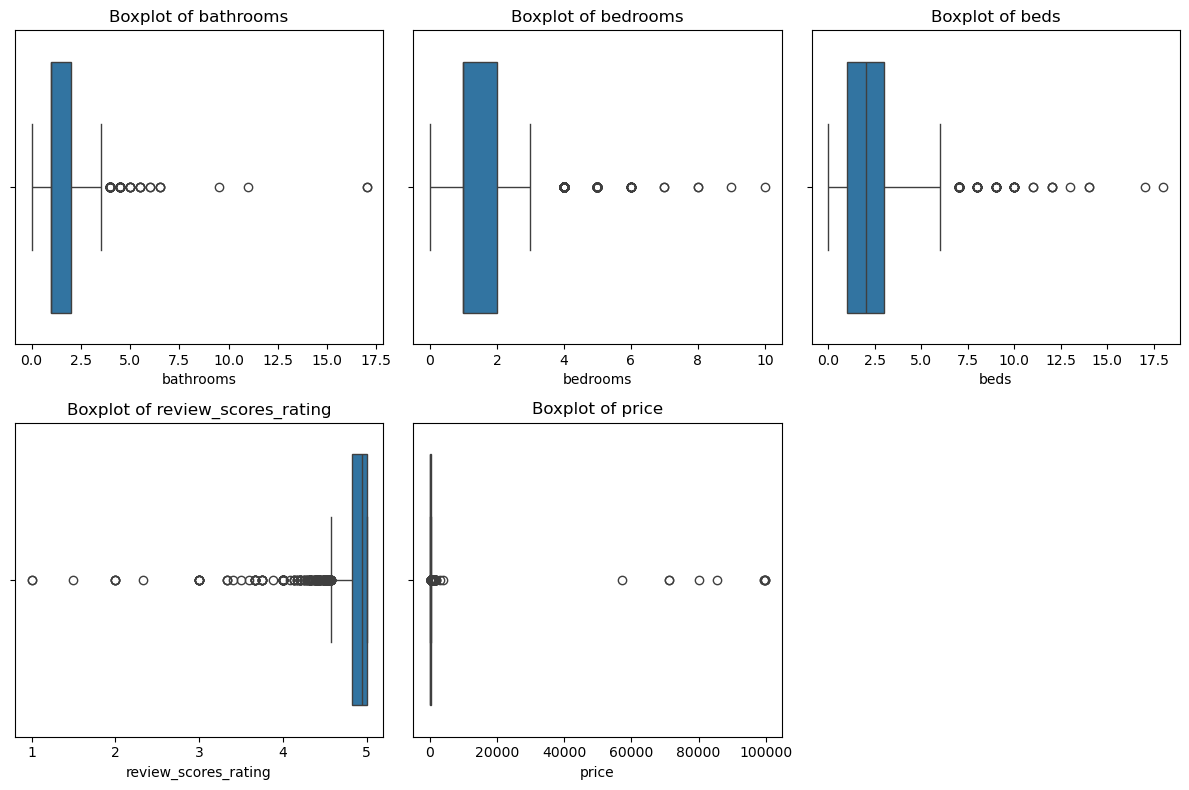

In [ ]:
# List of columns to check for outliers
columns_to_check = ["bathrooms", "bedrooms", "beds", "review_scores_rating", "price"]

# Create boxplots for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=listings_df, x=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
#REMOVING OUTLIERS
# Calculate IQR for continuous columns
Q1 = listings_df[["bathrooms", "bedrooms", "beds", "review_scores_rating", "price"]].quantile(0.25)
Q3 = listings_df[["bathrooms", "bedrooms", "beds", "review_scores_rating", "price"]].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where values are outside the IQR bounds
outliers_iqr = ((listings_df[["bathrooms", "bedrooms", "beds", "review_scores_rating", "price"]] < lower_bound) | 
                (listings_df[["bathrooms", "bedrooms", "beds", "review_scores_rating", "price"]] > upper_bound)).any(axis=1)

# Remove rows with outliers based on IQR
listings_df_no_outliers_iqr = listings_df[~outliers_iqr]

# Check the shape after removing outliers
print(f"Data shape after removing IQR outliers: {listings_df_no_outliers_iqr.shape}")

Data shape after removing IQR outliers: (3017, 16)


In [ ]:
# List of price outliers to drop
ids_to_drop = [57042, 71227, 71313, 79999, 85428, 99570, 99713]

# Drop rows with these prices
listings_df = listings_df[~listings_df['price'].isin(ids_to_drop)]

#### EDA

In [ ]:
# Get the numerical columns excluding 'ID' and then describe
listings_df.drop(columns=['id'], inplace=False).describe().round(2)

,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_value
count,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00
mean,0.98,4.22,1.49,1.75,2.18,190.31,73.81,4.87,4.78
std,0.09,2.66,0.91,1.13,1.67,182.92,118.05,0.26,0.32
min,0.00,1.00,0.00,0.00,0.00,17.00,1.00,1.00,1.00
25%,1.00,2.00,1.00,1.00,1.00,98.00,6.00,4.84,4.73
50%,1.00,4.00,1.00,1.00,2.00,139.00,28.50,4.94,4.86
75%,1.00,6.00,2.00,2.00,3.00,218.00,90.00,5.00,4.94
max,1.00,16.00,17.00,10.00,18.00,3814.00,1529.00,5.00,5.00


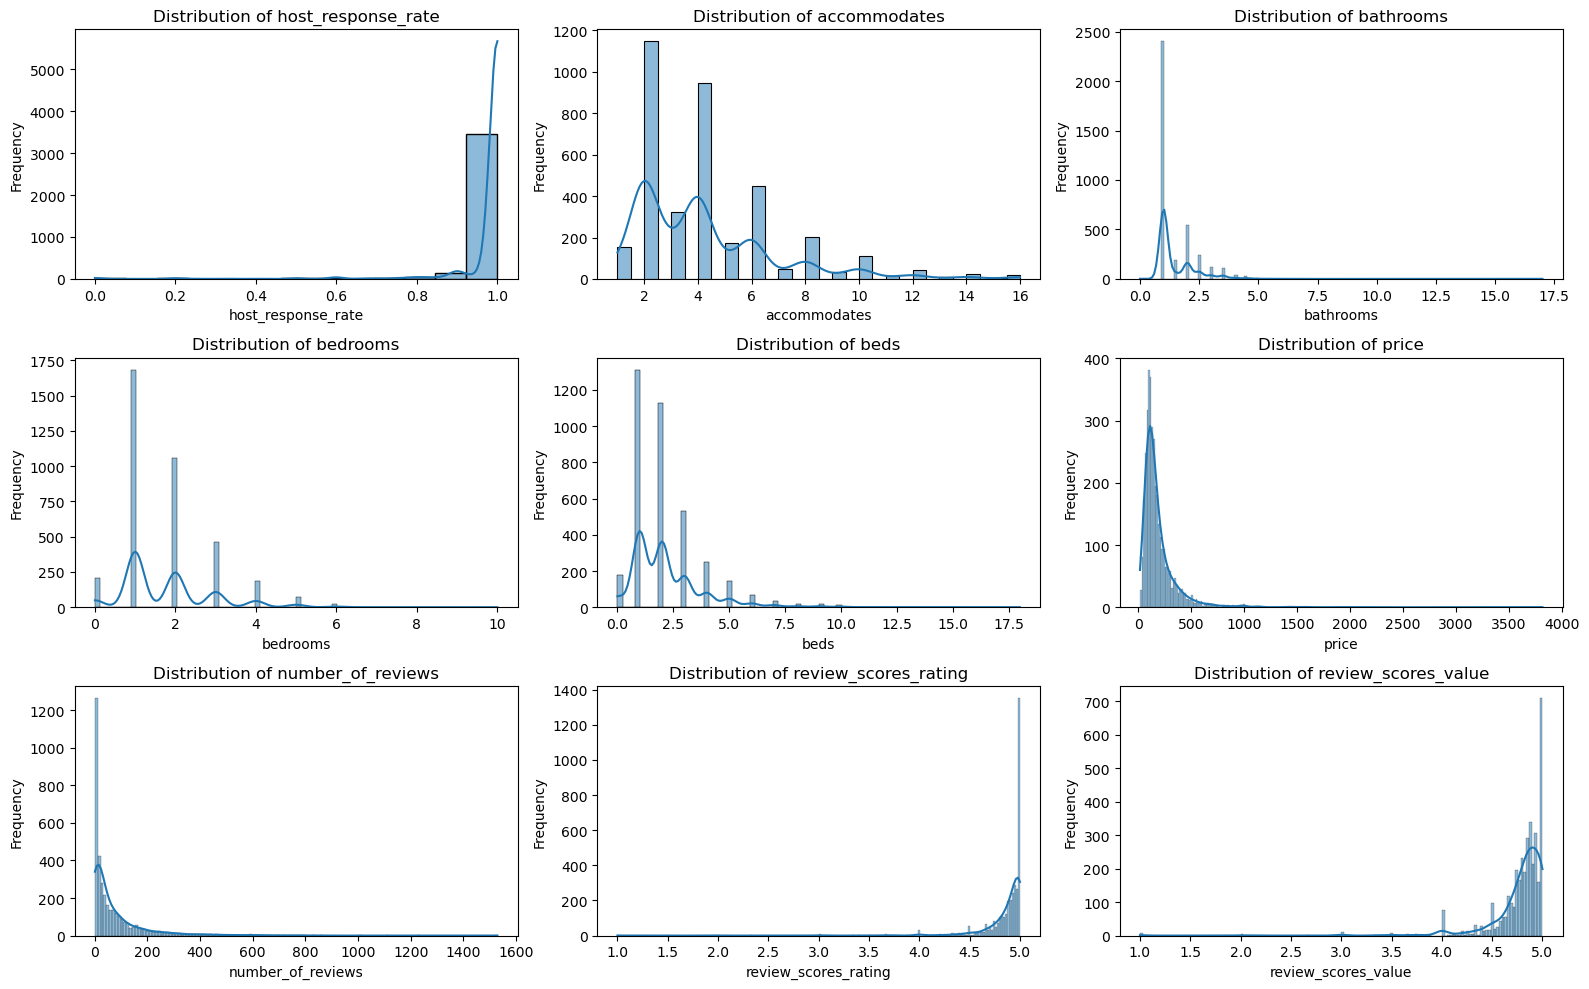

In [ ]:
# Select numerical columns, excluding 'ID'
numerical_cols = listings_df.select_dtypes(include='number').columns.tolist()
numerical_cols.remove('id')  # Exclude the 'id' column

# Create histograms for the numerical variables
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns for the subplots
    sns.histplot(listings_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

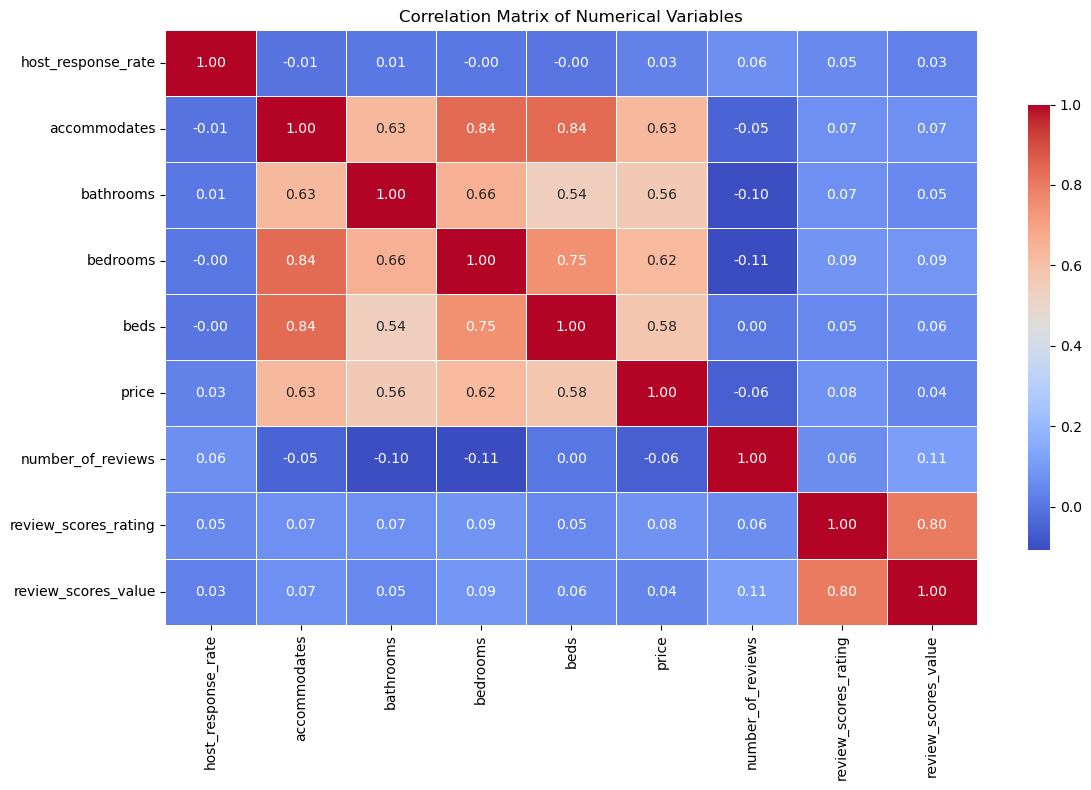

In [ ]:
# Compute the correlation matrix
correlation_matrix = listings_df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.75})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

/var/folders/yr/n0p_yr611n137wl82c27v0jh0000gn/T/ipykernel_40297/2566558259.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=listings_df, palette='viridis', ci=None)
/var/folders/yr/n0p_yr611n137wl82c27v0jh0000gn/T/ipykernel_40297/2566558259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=listings_df, palette='viridis', ci=None)


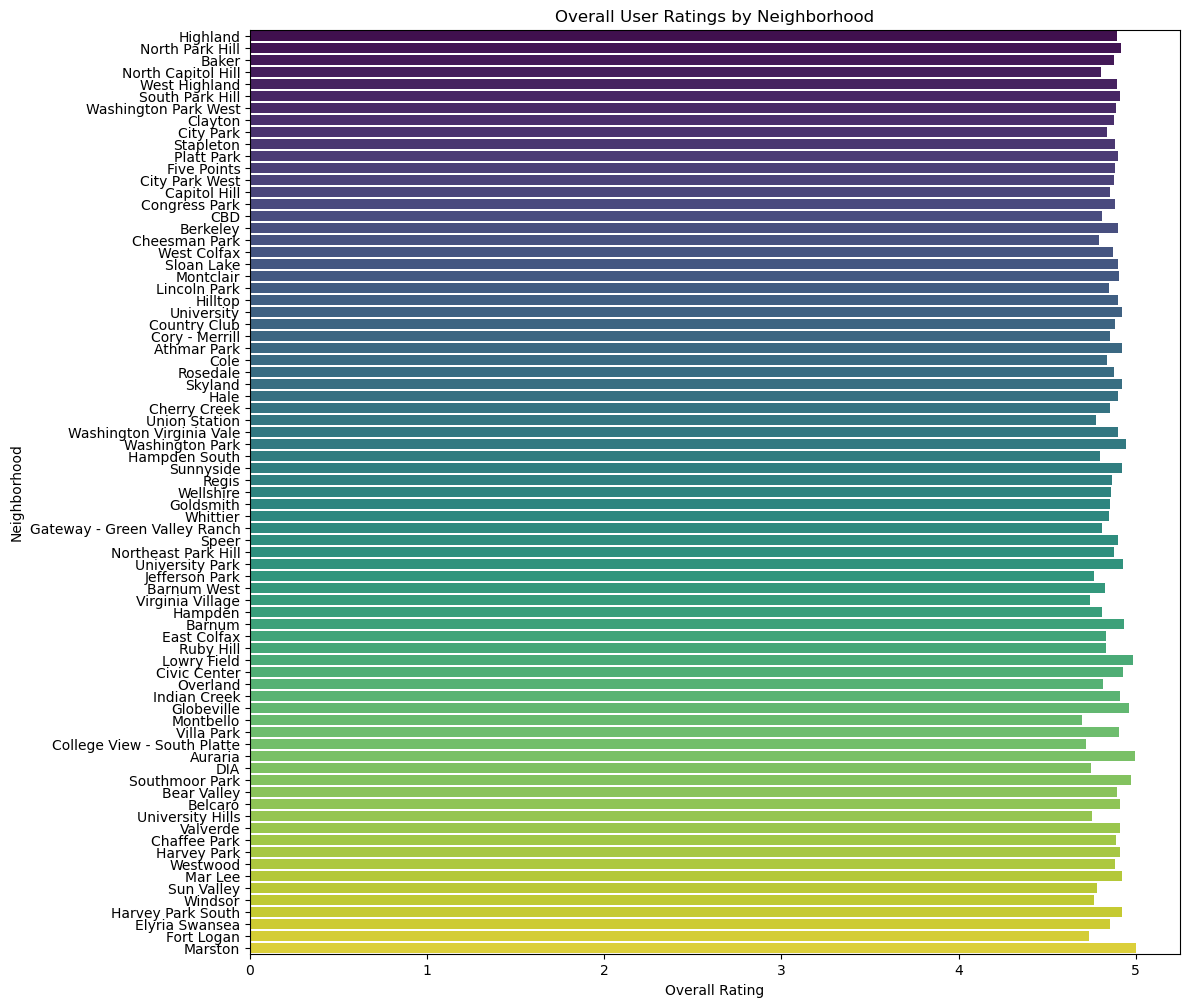

In [ ]:
plt.figure(figsize=(12, 12))  # Increase the figure size
sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=listings_df, palette='viridis', ci=None)
plt.title('Overall User Ratings by Neighborhood')
plt.xlabel('Overall Rating')
plt.ylabel('Neighborhood')

# Adjust font size for y-ticks
plt.yticks(fontsize=10, rotation=0)  # Change fontsize and rotation as needed

plt.show()

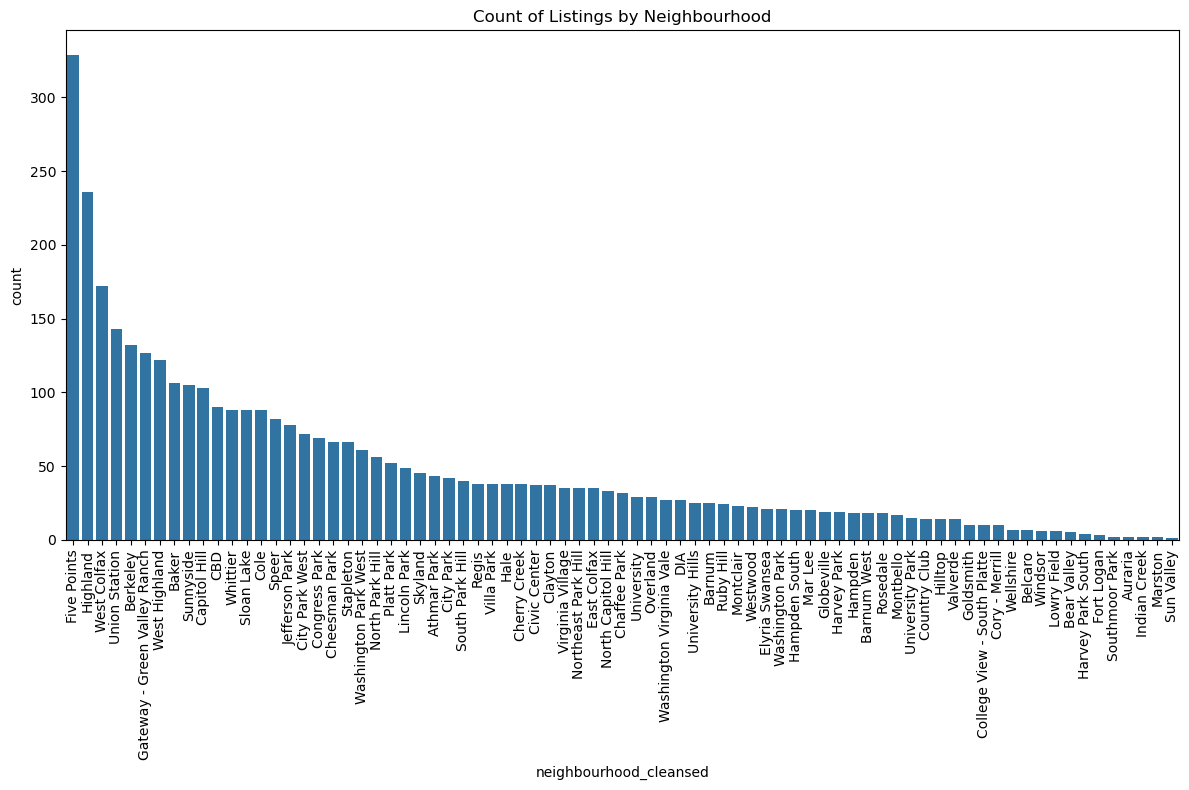

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot to show the count of listings in each neighbourhood
sns.countplot(data=listings_df, x='neighbourhood_cleansed', order=listings_df['neighbourhood_cleansed'].value_counts().index)

# Add title and adjust x-axis labels for readability
plt.title('Count of Listings by Neighbourhood')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

### Analysis of Questions

#### Linear Regression

In [ ]:
from statsmodels.formula.api import ols

# Preprocessing the data
# Remove rows with missing values in the selected columns
columns_to_check = [
    "neighbourhood_cleansed", "bathrooms", "bedrooms", "beds", "review_scores_rating", "price"
]
listings_df = listings_df.dropna(subset=columns_to_check)

# Define the features and target
X = listings_df[["neighbourhood_cleansed", "bathrooms", "bedrooms", "beds", "review_scores_rating"]]
y = listings_df["price"].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with one-hot encoding for categorical features and linear regression
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['neighbourhood_cleansed']),  # One-hot encoding for neighbourhood_cleansed
            ('num', 'passthrough', ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating'])  # Keep numeric columns as is
        ])),
    ('model', LinearRegression())  # Linear Regression model
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

model = ols("price ~ C(neighbourhood_cleansed) + bathrooms + bedrooms + beds + review_scores_rating", data = listings_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     46.05
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:29:39   Log-Likelihood:                -23237.
No. Observations:                3702   AIC:                         4.664e+04
Df Residuals:                    3621   BIC:                         4.714e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -162.8545     46.536     -3.500      0.000    -254.093     -71.616
C(neighbourhood_cleansed)[T.Auraria]                         66.3952     94.244      0.705      0.481    -118.381     251.172
C(neighbourhood_cleansed)[T.Baker]                           41.4965     23.592      1.759      0.079      -4.758      87.751
C(neighbourhood_cleansed)[T.Barnum]                          37.0470     32.758      1.131      0.258     -27.178     101.272
C(neighbourhood_cleansed)[T.Barnum West]                    -38.1511     36.578     -1.043      0.297    -109.867      33.564
C(neighbourhood_cleansed)[T.Bear Valley]                     30.1180     61.522      0.490      0.624     -90.503     150.739
C(neighbourhood_cleansed)[T.Belcaro]                        204.4037     53.141      3.846      0.000     100.213     308.594
C(neighbourhood_cleansed)[T.Berkeley]                        91.5022     22.884      3.999      0.000      46.636     136.369
C(neighbourhood_cleansed)[T.CBD]                             81.7314     24.231      3.373      0.001      34.225     129.238
C(neighbourhood_cleansed)[T.Capitol Hill]                    28.5972     23.757      1.204      0.229     -17.981      75.176
C(neighbourhood_cleansed)[T.Chaffee Park]                    75.0751     30.420      2.468      0.014      15.433     134.717
C(neighbourhood_cleansed)[T.Cheesman Park]                   59.9375     25.560      2.345      0.019       9.825     110.050
C(neighbourhood_cleansed)[T.Cherry Creek]                    76.3495     29.079      2.626      0.009      19.338     133.361
C(neighbourhood_cleansed)[T.City Park]                       86.7439     28.318      3.063      0.002      31.223     142.265
C(neighbourhood_cleansed)[T.City Park West]                  41.9323     25.128      1.669      0.095      -7.334      91.198
C(neighbourhood_cleansed)[T.Civic Center]                   149.0678     29.253      5.096      0.000      91.713     206.422
C(neighbourhood_cleansed)[T.Clayton]                         35.9548     29.214      1.231      0.219     -21.324      93.233
C(neighbourhood_cleansed)[T.Cole]                            97.7969     24.252      4.032      0.000      50.247     145.347
C(neighbourhood_cleansed)[T.College View - South Platte]     64.8339     45.751      1.417      0.157     -24.867     154.535
C(neighbourhood_cleansed)[T.Congress Park]                   51.0760     25.306      2.018      0.044       1.461     100.691
C(neighbourhood_cleansed)[T.Cory - Merrill]                  39.6424     45.717      0.867      0.386     -49.992     129.277
C(neighbourhood_cleansed)[T.Country Club]                  

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error

# Define the formula, using C() for categorical variables
formula = "price ~ C(neighbourhood_cleansed) + bathrooms + bedrooms + beds + review_scores_rating"

# Fit the OLS model using the formula
model = ols(formula=formula, data=listings_df).fit()

# Make predictions with the model
y_pred_ols = model.predict(listings_df)

# Calculate MSE by comparing predicted and actual values
mse_ols = mean_squared_error(listings_df["price"], y_pred_ols)
print(f"Mean Squared Error (OLS): {mse_ols}")

Mean Squared Error (OLS): 16581.567001699397


In [ ]:
# Preprocessing the data
# Remove rows with missing values in the selected columns
columns_to_check = [
    "neighbourhood_cleansed", "bathrooms", "bedrooms", "beds", "review_scores_rating", "price"
]
listings_df = listings_df.dropna(subset=columns_to_check)

# Define the features and target
X = listings_df[["neighbourhood_cleansed", "bathrooms", "bedrooms", "beds", "review_scores_rating"]]
y = listings_df["price"].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with one-hot encoding for categorical features and linear regression
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['neighbourhood_cleansed']),  # One-hot encoding for neighbourhood_cleansed
            ('num', 'passthrough', ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating'])  # Keep numeric columns as is
        ])),
    ('model', LinearRegression())  # Linear Regression model
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 15901.96505334208
R-squared: 0.5253861129861204


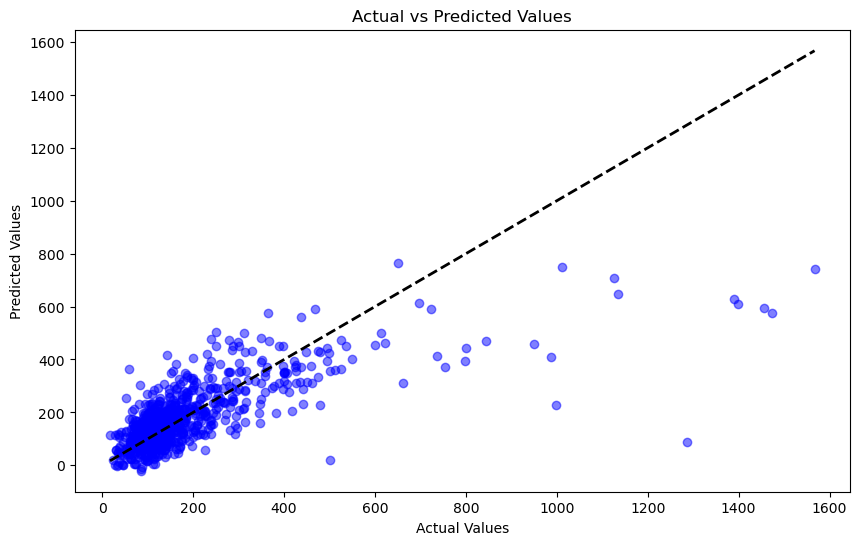

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

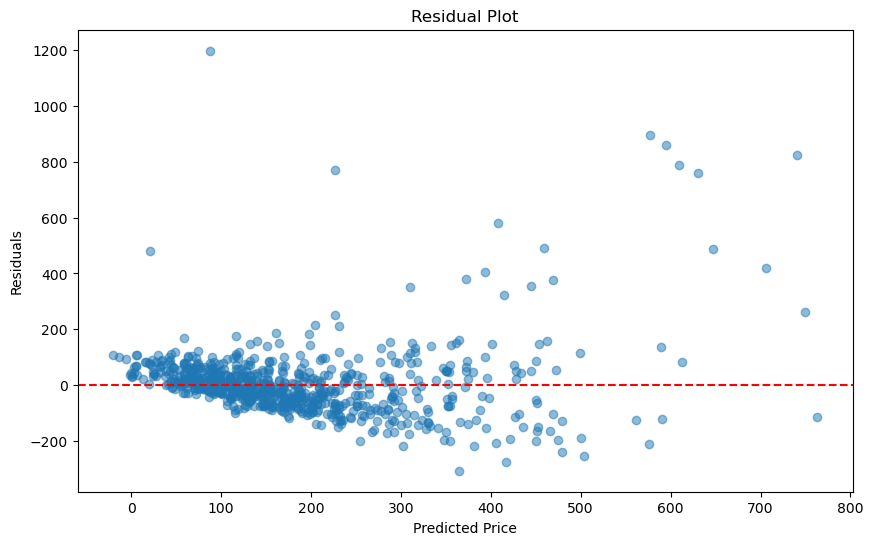

In [ ]:
# Create Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

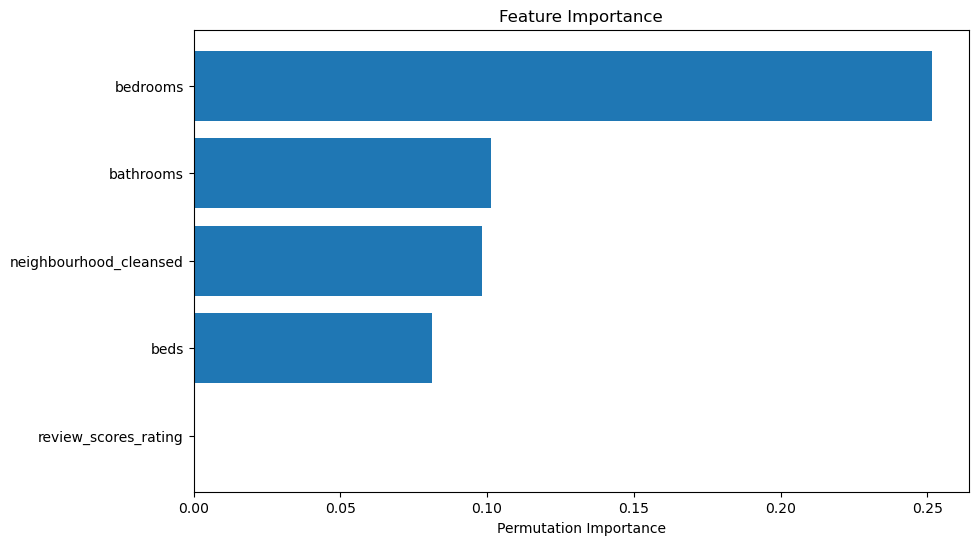

In [ ]:
from sklearn.inspection import permutation_importance  # Add this line to import permutation_importance

# Feature Importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()

##### **Conclusions of Linear Regression Model**
- Key predictors indetified for price" Bedrooms, beds, bathrooms and neighborhood.
- 

#### Nueral Network Model

In [ ]:
listings_df['review_score_high_low'] = listings_df['review_scores_value'].apply(lambda x: 1 if x > 4 else 0)

In [ ]:
# Define mappings for each categorical variable
room_type_mapping = {
    'Entire home/apt': 3,
    'Hotel room': 2,
    'Private room': 1,
    'Shared room': 0
}

host_response_time_mapping = {
    'within an hour': 3,
    'within a few hours': 2,
    'within a day': 1,
    'a few days or more': 0
}

# Apply mappings to the DataFrame
listings_df['room_type_num'] = listings_df['room_type'].map(room_type_mapping)
listings_df['host_response_time_num'] = listings_df['host_response_time'].map(host_response_time_mapping)

# Display the first few rows to verify the changes
listings_df[['room_type', 'room_type_num', 'host_response_time', 'host_response_time_num']].head()


,room_type,room_type_num,host_response_time,host_response_time_num
0,Entire home/apt,3,within an hour,3
2,Private room,1,within an hour,3
3,Private room,1,within an hour,3
4,Entire home/apt,3,within an hour,3
5,Private room,1,within a few hours,2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['bathrooms', 'bedrooms', 'beds', 'price', 'room_type_num', 'host_response_time_num', 'accommodates', 'number_of_reviews', 'host_response_rate']
target = 'review_score_high_low'

# Drop rows with missing values in the selected columns
data_cleaned = listings_df[features + [target]].dropna()

# Split data into features and target
X = data_cleaned[features]
y = data_cleaned[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for neural network models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Build the model
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9622132253711201
Precision: 0.966078697421981
Recall: 0.9958041958041958
F1 Score: 0.9807162534435262

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.04      0.07        26
           1       0.97      1.00      0.98       715

    accuracy                           0.96       741
   macro avg       0.61      0.52      0.52       741
weighted avg       0.94      0.96      0.95       741



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 0.037786774628879895
R-squared: -0.11608391608391622


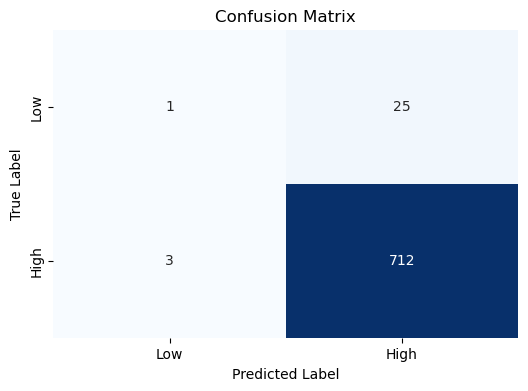

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

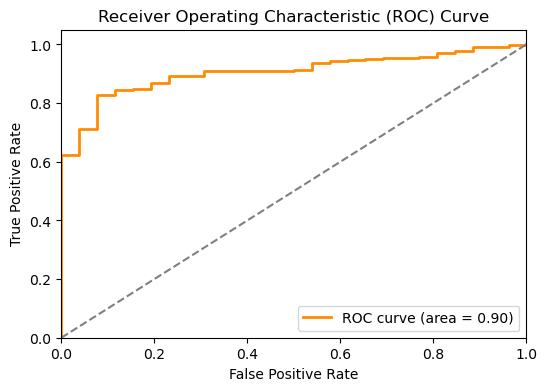

In [ ]:
# ROC Curve and AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

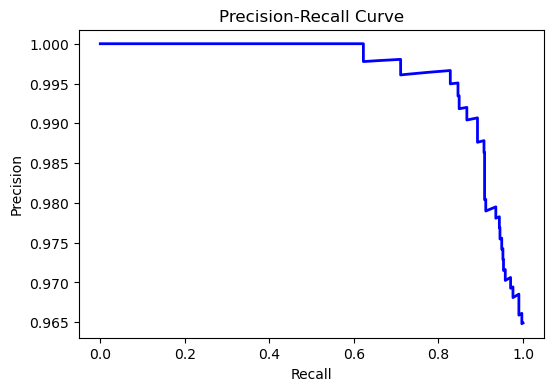

In [ ]:
# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
listings_df.to_csv("Datafile.csv", index=False)

##### **Conclusions for Nueral Network**
Based on the confusion matrix the model has very high recall for the rating "High" class and miss al predictions for the rating "Low" class. This indicates that the model is heavily biased towards predicting "High" and struggles to indentify "Low" accurately. The accuracy overall is very high at 96.5%, but it might be misleading due to the class imablance where "High" dominates. The model has high precision fo rthe "High" class(1) but for "Low" class(0) it has 0 percision which means that the model fails to correctly predict low cases. Looking at the ROC curve we have AUC .58. This is above random guessing at 0.5). This suggests that the model lacks discriminative power and struggles to seperate the two classes effectively. Lastly, the precision recall curve shows fluctuations in precision as recall increases. A generally high precision score is observed, but the fluctuations indicate that precision decreases as recall attempts to cover more true positives.


#### Conclusion
The Linear Regression model  ......

The Nueral Network model performs well on the dominant "High" class but fails to generalize to the minority "Low" class, showing a class imbalance issue. Despite high accuracy and a strong F1 score for the "High" class, the model's low AUC and zero recall for the "Low" class indicate limited effectiveness in identifying both classes equally. Improving the model may require addressing class imbalance, possibly by adjusting class weights, collecting more data for the "Low" class, or using resampling techniques. 

Overall neither model is great at predicting and other variables and models should be considered to further investigate this data. 